In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
import json as js

path = '/home/nas1_userB/sunghyun/Project/Sparse-Nerface/nerface_dataset/person_1/transforms_train.json'
path_deca= '/home/nas1_userB/sunghyun/Project/Sparse-Nerface/nerface_dataset/person_1/train_3dmm_DECA'


with open(path, 'r') as f:
    json_file = js.load(f)
    
expr_vectors = []
rot_matrices=[]

for i in json_file['frames']:
    expr_vectors.append(np.array(i['expression']))
    rot_matrices.append(np.array(i['transform_matrix']))
    
expr_vectors_np = np.array(expr_vectors)
rot_matrices_np = np.array(rot_matrices)
print(expr_vectors_np.shape, ": Expression vectors shape")
print(rot_matrices_np.shape, ": Rotation matrices shape")





(5507, 76) : Expression vectors shape
(5507, 4, 4) : Rotation matrices shape


In [7]:
density_path = '/home/nas4_user/jaeseonglee/density_check.json'
#with open(density_path,'r') as d:
#    djs = js.load(d)
data = [js.loads(line) for line in open(density_path, 'r')]
#djs.shape

JSONDecodeError: Expecting property name enclosed in double quotes: line 2 column 1 (char 2)

In [ ]:
djs

In [5]:
data=dict()
data['min'] = np.min(expr_vectors_np, axis=0).tolist()
data['max'] = np.min(expr_vectors_np, axis=0).tolist()
np.min(expr_vectors_np, axis=0),np.max(expr_vectors_np, axis=0),


(array([-0.00707235, -0.243038  , -0.27262   , -0.283314  , -0.36428   ,
        -0.143371  , -0.127289  , -0.212238  , -0.423516  , -0.133755  ,
        -0.199668  ,  0.0194412 , -0.215032  , -0.165716  ,  0.0534266 ,
        -0.20415   , -0.158575  , -0.107914  , -0.289265  , -0.202041  ,
        -0.243512  , -0.165328  , -0.427762  , -0.247024  , -0.0518652 ,
        -0.127012  , -0.128602  , -0.18508   , -0.168279  , -0.0419355 ,
        -0.0806087 , -0.174884  ,  0.00963896, -0.238291  , -0.594743  ,
        -0.198408  , -0.145102  , -0.0860165 , -0.139157  , -0.234451  ,
        -0.331969  , -0.0510311 , -0.301813  , -0.298048  , -0.457556  ,
        -0.355881  , -0.13254   , -0.337059  , -0.0104487 , -0.153538  ,
        -0.397777  , -0.28154   , -0.247377  , -0.345125  , -0.10257   ,
        -0.228426  , -0.253591  , -0.295482  , -0.272769  , -0.218032  ,
        -0.275224  , -0.134276  ,  0.0139463 , -0.122822  , -0.115763  ,
        -0.424438  , -0.263988  , -0.245305  , -0.4

In [11]:
import glob, os
import scipy.io as sio


In [42]:
deca_3dmm=np.array(deca_3dmm)
deca_3dmm.shape

(5507, 3)

In [7]:
file_path = "../preprocessed/3dmm_expr_minmax.json"

with open(file_path, 'w', encoding='utf-8') as file:
    js.dump(data, file)

# Rotation bound test

In [8]:
flame_path = '/home/nas4_user/jaeseonglee/nerface_data_preprocess/person1/train/person1_flame_params_train_.json'
import json as js
with open(flame_path, 'r') as file:
    jsd= js.load(file)
import numpy as np
#np.array(jsd['frames'][0]['shape'])
im_param=[]
im_headR=[]
for i in range(5507):
    im_param.append(jsd['frames'][i]['world_mat'])
    im_headR.append(jsd['frames'][i]['pose'])
#jsd['frames'][1]['world_mat'], jsd['frames'][-1]['world_mat']
im_T = np.array(im_param)[:,:,3]
im_headR = np.array(im_headR)[:,3:6]
#np.array(im_param)[:,3]
#np.array(jsd['frames'][0]['world_mat'])[:,3], np.array(jsd['frames'][3]['world_mat'])[:,3] ,np.array(jsd['frames'][-1]['world_mat'])[:,3]


In [9]:
im_headR[0].shape

(3,)

In [12]:
from scipy.spatial.transform import Rotation as R

import glob, os
tdmm_path = '/home/nas1_userB/sunghyun/Project/Sparse-Nerface/nerface_dataset/person_1/train/3dmms'
tdmm_bundle = glob.glob(os.path.join(tdmm_path,'*.mat'))
#sio.loadmat(tdmm_bundle[i])['angle']
print(len(rot_matrices))
print(len(tdmm_bundle))
nerface_params=[]
tdmm_params=[]
nerface_T=[]
tdmm_T=[]
for i in range(len(rot_matrices)):
    
    nerface = R.from_matrix(rot_matrices[i][:3,:3]).as_rotvec()
    tdmm = sio.loadmat(tdmm_bundle[i])['angle'][0]
    nerface_params.append(nerface)
    tdmm_params.append(tdmm)
    nerface_T.append(rot_matrices[i][:,-1])
    tdmm_T.append(sio.loadmat(tdmm_bundle[i])['trans'][0])
    

5507
5507


In [13]:
nerface_T[0].shape, tdmm_T[0].shape
tdmm_T = np.array(tdmm_T)
nerface_T = np.array(nerface_T)

In [14]:
def rad2eul(rv):
    import math
    
    return (rv/math.pi)*180

In [15]:
print(len(nerface_params),len(tdmm_params))
nerface_params = np.array(nerface_params)
tdmm_params = np.array(tdmm_params)
print(nerface_params.shape, tdmm_params.shape)
print("Nerface R mean:", rad2eul(np.mean(nerface_params,axis=0)))
print("Nerface R max:", rad2eul(np.max(nerface_params, axis=0)))
print("Nerface R min:", rad2eul(np.min(nerface_params, axis=0)))
print("Nerface R max-min", abs(rad2eul(np.max(nerface_params, axis=0))-rad2eul(np.min(nerface_params, axis=0))))
print("Nerface R max-frontal",abs(rad2eul(np.max(nerface_params, axis=0))-rad2eul(nerface_params[-1])))
print("Nerface R min-frontal",abs(rad2eul(np.min(nerface_params, axis=0))-rad2eul(nerface_params[-1])))


print("3DMM R mean:", rad2eul(np.mean(tdmm_params,axis=0)))

print("3DMM R max:", rad2eul(np.max(tdmm_params, axis=0)))

print("3DMM R min:", rad2eul(np.min(tdmm_params, axis=0)))
print("3DMM R max-min", abs(rad2eul(np.max(tdmm_params, axis=0))-rad2eul(np.min(tdmm_params, axis=0))))

print("3DMM R max-frontal",abs(rad2eul(np.max(tdmm_params, axis=0))-rad2eul(tdmm_params[-1])))
print("3DMM R min-frontal",abs(rad2eul(np.min(tdmm_params, axis=0))-rad2eul(tdmm_params[-1])))





5507 5507
(5507, 3) (5507, 3)
Nerface R mean: [-9.52033819  5.25777058 -0.54723033]
Nerface R max: [-3.29317959 33.35804658 13.25395816]
Nerface R min: [-15.46831681 -32.51374839 -16.93166711]
Nerface R max-min [12.17513722 65.87179497 30.18562528]
Nerface R max-frontal [ 7.51205261 48.62748882 14.76064543]
Nerface R min-frontal [ 4.66308461 17.24430615 15.42497985]
3DMM R mean: [-0.80515045  3.5869646  -1.3878732 ]
3DMM R max: [ 8.178069 34.38158  13.900098]
3DMM R min: [-11.242339 -38.699123 -20.25202 ]
3DMM R max-min [19.420408 73.0807   34.15212 ]
3DMM R max-frontal [ 3.050991 52.822014 17.203926]
3DMM R min-frontal [16.369417 20.258688 16.94819 ]


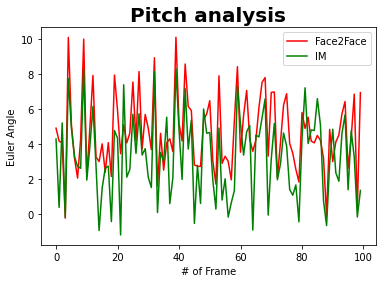

In [16]:
import matplotlib.pyplot as plt
plt.plot(range(len(nerface_params[:100])), rad2eul(-nerface_params[:,0][:100])-5,'r',label='Face2Face')
#plt.plot(range(len(nerface_params[:100])), rad2eul(tdmm_params[:,0][:100]),'b',label='BFM')
plt.plot(range(len(nerface_params[:100])), rad2eul(im_headR[:,0][:100]),'g',label='IM')

plt.xlabel('# of Frame')
plt.ylabel('Euler Angle')
title_font = {
    'fontsize': 20,
    'fontweight': 'bold'
}
plt.title('Pitch analysis')
plt.title('Pitch analysis',fontdict=title_font)
plt.legend()

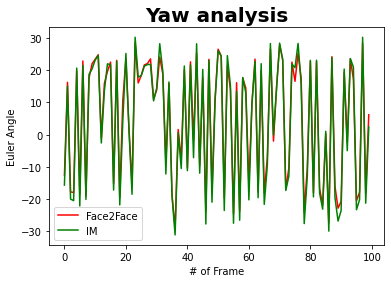

In [17]:
plt.plot(range(len(nerface_params[:100])), rad2eul(nerface_params[:,1][:100]),'r',label='Face2Face')
plt.plot(range(len(nerface_params[:100])), rad2eul(im_headR[:,1][:100]),'g',label='IM')
plt.xlabel('# of Frame')
plt.ylabel('Euler Angle')
title_font = {
    'fontsize': 20,
    'fontweight': 'bold'
}
plt.title('Yaw analysis')
plt.title('Yaw analysis',fontdict=title_font)
plt.legend()

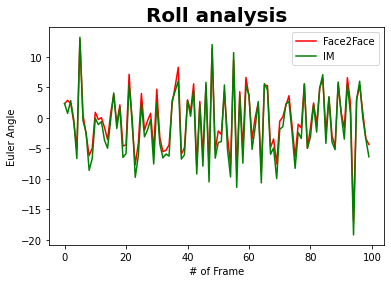

In [18]:
plt.plot(range(len(nerface_params[:100])), rad2eul(nerface_params[:,2][:100]),'r',label='Face2Face')
plt.plot(range(len(nerface_params[:100])), rad2eul(im_headR[:,2][:100]),'g',label='IM')
plt.xlabel('# of Frame')
plt.ylabel('Euler Angle')
title_font = {
    'fontsize': 20,
    'fontweight': 'bold'
}
plt.title('Roll analysis')
plt.title('Roll analysis',fontdict=title_font)
plt.legend()

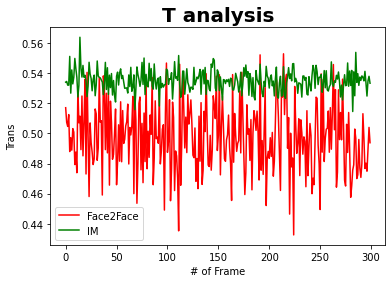

In [36]:

plt.plot(range(len(nerface_params[:30])), nerface_T[:300,2],'r',label='Face2Face')

plt.plot(range(len(nerface_params[:30])), -im_T[:300,2]/10,'g',label='IM')
#plt.plot(range(len(nerface_params)), tdmm_T[:,2],'b',label='BFM')
plt.xlabel('# of Frame')
plt.ylabel('Trans')
title_font = {
    'fontsize': 20,
    'fontweight': 'bold'
}
plt.title('T analysis')
plt.title('T analysis',fontdict=title_font)
plt.legend()

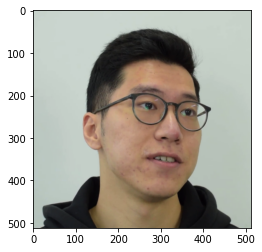

In [35]:
from PIL import Image
img_path ='/home/nas1_userB/sunghyun/Project/Sparse-Nerface/nerface_dataset/person_1/test'
a=glob.glob(img_path+"/*.png")
f=Image.open(a[0])

l=Image.open(a[-1])


plt.imshow(f)




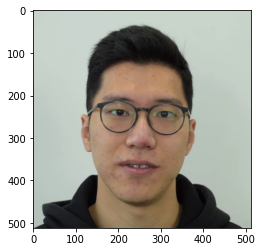

In [34]:
plt.imshow(l)

# Params analysis

In [131]:
def find_similar_vectors(proxy_ind, num, vector_bundle):
    candidates_ind = [proxy_ind,]
    #diversity_values = []
    idx = 0
    temp_sim=[]
    while idx!=num-1:
    #for idx,i in enumerate(candidates_ind):
        #if idx==num:
        #    break
        #print(idx,candidates_ind)
        i = candidates_ind[idx]
        #print(i)
        if idx==0:
            temp_sim = [np.linalg.norm(vector_bundle[i]-j) for j in vector_bundle]
            temp_sim = [ v / np.sqrt(np.sum(np.array(temp_sim)**2)) for v in temp_sim]
        else:
            temp_sim2 = [np.linalg.norm(vector_bundle[i]-j) for j in vector_bundle]
            temp_sim2 = [ v / np.sqrt(np.sum(np.array(temp_sim2)**2))for v in temp_sim2]
            temp_sim = [temp_sim[j]+temp_sim2[j] for j in range(len(vector_bundle))]
        candidates_ind.append(heapq.nsmallest(idx+1,range(len(vector_bundle)),temp_sim.__getitem__)[idx])
        idx+=1
    return candidates_ind

# - Far expressions and Near head rotations

In [89]:
toy_vector = np.ones((4,1))
n_cls=50
pose_vec_bundle = [np.matmul(i,toy_vector) for i in rot_matrices]

k_means = KMeans(init="k-means++", n_clusters=n_cls,max_iter=500, n_init=12) 
k_means.fit(expr_vectors_np)

k_labels = k_means.labels_
k_centers = k_means.cluster_centers_


k_centers_indices=[]
for i in range(n_cls):
    k_values=[np.linalg.norm(expr_vectors[j]-k_centers[i]) for j in range(5507)]
    k_centers_indices.append(np.argmin(k_values))
print('- K centers which contain indices number: \n', k_centers_indices)


- K centers which contain indices number: 
 [3928, 4312, 1264, 3270, 2641, 44, 1899, 2432, 4200, 2315, 5400, 1851, 5444, 3870, 134, 4218, 542, 1332, 3019, 722, 514, 3119, 1646, 721, 4345, 4242, 2827, 4100, 2829, 4247, 291, 3037, 5353, 3141, 1237, 1193, 5493, 3690, 2206, 1176, 594, 1480, 5443, 2446, 2867, 3210, 2718, 2130, 1000, 4394]


In [150]:
pose_vec_bundle=[ v / np.sqrt(np.sum(v**2))for v in pose_vec_bundle]
print(pose_vec_bundle[:10])
print(np.linalg.norm(pose_vec_bundle[0]))
print(np.linalg.norm(pose_vec_bundle[1]))
print(np.linalg.norm(pose_vec_bundle[2]))
print(np.linalg.norm(pose_vec_bundle[3]))
print(np.linalg.norm(pose_vec_bundle[4]))
print(np.linalg.norm(pose_vec_bundle[5]))
print(np.linalg.norm(pose_vec_bundle[6]))
print(np.linalg.norm(pose_vec_bundle[2432]))

print(np.linalg.norm(toy_vector))

#pose_vec_bundle=[ v / np.sqrt(np.sum(v**2))for v in pose_vec_bundle]

[array([[0.26247464],
       [0.56194614],
       [0.65491913],
       [0.4317459 ]]), array([[0.56382134],
       [0.54790213],
       [0.44168612],
       [0.43222925]]), array([[0.19970057],
       [0.55417794],
       [0.68323627],
       [0.43150283]]), array([[0.21613091],
       [0.48727283],
       [0.7280988 ],
       [0.43095795]]), array([[0.65234881],
       [0.51931193],
       [0.34501996],
       [0.43094939]]), array([[0.09058952],
       [0.61174658],
       [0.65619071],
       [0.43240421]]), array([[0.63639587],
       [0.51480618],
       [0.37825868],
       [0.43231385]]), array([[0.22240956],
       [0.50421381],
       [0.71437062],
       [0.43125057]]), array([[0.64894903],
       [0.46373492],
       [0.42124832],
       [0.43170005]]), array([[0.66742834],
       [0.51543453],
       [0.32098646],
       [0.43108507]])]
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0


In [161]:

########################################################################################################################################

k_centers_values = [pose_vec_bundle[i] for i in k_centers_indices]
#for i in k_centers_values:
    #print(np.linalg.norm(i))
assert len(k_centers_values) == n_cls  
#mean_pose=np.mean(np.array(k_centers_values),axis=0)
#random_center_rel_index = heapq.nsmallest(1,range(n_cls),[np.linalg.norm(i-mean_pose) for i in k_centers_values].__getitem__)[0]
#print("Relative center index: ", random_center_rel_index)
#random_center_index = k_centers_indices[random_center_rel_index]
random_center_index = np.random.choice(k_centers_indices,size=1)[0]

print("-",random_center_index, ': Randomly selected anchor index from '+str(len(k_centers_values))+' values.')
#print(random_center_index)
#print(k_centers_values)
random_center_rel_index = k_centers_indices.index(random_center_index)
print("-",random_center_rel_index, ': Randomly selected rel anchor index from '+str(len(k_centers_values))+' values.')
anchor_center_value = pose_vec_bundle[random_center_index]# which is center pose value
temp=[np.linalg.norm(i-anchor_center_value) for i in k_centers_values]
print('minimum/mean/maximum: ',min(temp),sum(temp)/len(temp),max(temp))
import heapq
rel_ind_beta=find_similar_vectors(random_center_rel_index,6,k_centers_values)
print("- Relative beta indices: ",rel_ind_beta)
#rel_ind=heapq.nsmallest(6, range(len(temp)),temp.__getitem__)
#print("- Relative indices: ",rel_ind)
#for i in rel_ind:
#    j=k_centers_indices[i]
#    print(k_centers_indices[i],np.linalg.norm(pose_vec_bundle[j]-pose_vec_bundle[27]))
print("\n","&"*17,"\n")
for i in rel_ind_beta:
    #j=k_centers_indices[i]
    j=i
    print(k_centers_indices[i],np.linalg.norm(pose_vec_bundle[j]-pose_vec_bundle[random_center_index]))

- 134 : Randomly selected anchor index from 50 values.
- 14 : Randomly selected rel anchor index from 50 values.
minimum/mean/maximum:  0.0 0.3227928063390704 0.7907413137893066
- Relative beta indices:  [14, 14, 12, 36, 41, 6]

 &&&&&&&&&&&&&&&&& 

134 0.12202659358999589
134 0.12202659358999589
5444 0.3673064640981011
5493 0.7582629089840356
1480 0.08350725338385094
1899 0.08281319058025756


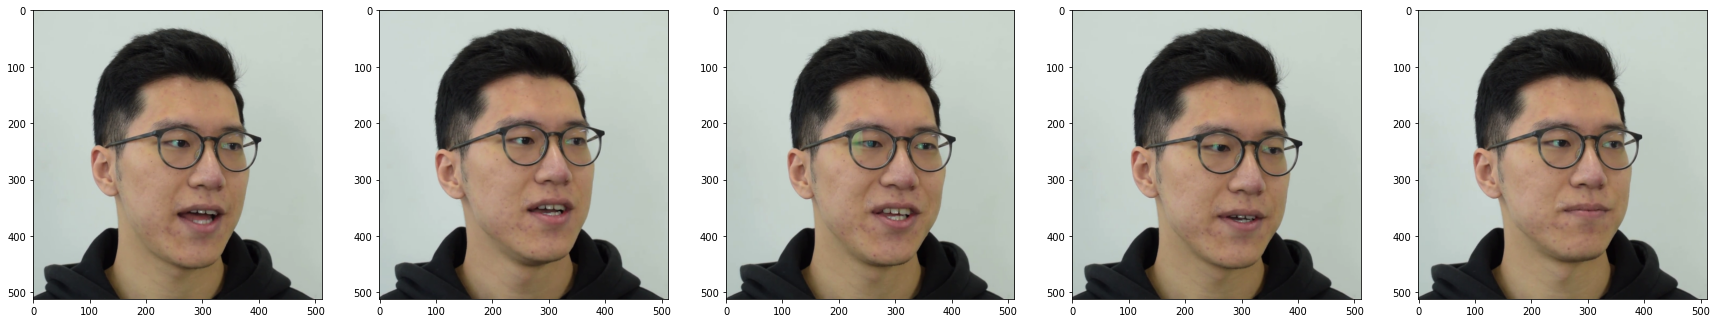

In [163]:
import matplotlib.image as img
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,30))
#plt.figure(figsize=(6,8))
rows = 2
cols = 5

ax1 = fig.add_subplot(rows, cols, 1)
ax2 = fig.add_subplot(rows, cols, 2)
ax3 = fig.add_subplot(rows, cols, 3)
ax4 = fig.add_subplot(rows, cols, 4)
ax5 = fig.add_subplot(rows, cols, 5)


ax1.imshow(img.imread('/home/nas1_userA/jaeseonglee/4D-Facial-Avatars/nerface_dataset/person_1/train/f_'+str(134).zfill(4)+'.png'))
ax2.imshow(img.imread('/home/nas1_userA/jaeseonglee/4D-Facial-Avatars/nerface_dataset/person_1/train/f_'+str(1480).zfill(4)+'.png'))
ax3.imshow(img.imread('/home/nas1_userA/jaeseonglee/4D-Facial-Avatars/nerface_dataset/person_1/train/f_'+str(1899).zfill(4)+'.png'))
ax4.imshow(img.imread('/home/nas1_userA/jaeseonglee/4D-Facial-Avatars/nerface_dataset/person_1/train/f_'+str(5444).zfill(4)+'.png'))
ax5.imshow(img.imread('/home/nas1_userA/jaeseonglee/4D-Facial-Avatars/nerface_dataset/person_1/train/f_'+str(5493).zfill(4)+'.png'))
#print(k_centers_values)

In [40]:
pose_vec_bundle_np=np.array(pose_vec_bundle)[...,0]
print(pose_vec_bundle[2],pose_vec_bundle_np[2])
print(pose_vec_bundle_np.shape, expr_vectors_np.shape)
#print(max(pose_vec_bundle_np))
k_means2 = KMeans(init="k-means++", n_clusters=5,max_iter=500) 
k_means2.fit(pose_vec_bundle_np)

k_labels2 = k_means2.labels_
k_centers2 = k_means2.cluster_centers_
#print(k_labels2[:100])
#print(len(k_centers2))
print(k_centers2[0].shape)
print(pose_vec_bundle_np[0].shape)
#print(k_centers2[2])
#pvb= np.argmin([np.linalg.norm(k_centers2[9]-pose_vec_bundle[i]) for i in range(5507)])
#print(pvb,"dsdas")
k_centers_indices2=[]
for i in range(5):
    k_values2=[np.linalg.norm(pose_vec_bundle_np[j]-k_centers2[i]) for j in range(5507)]#np로 넣어야함 디멘션 주의
    #print(np.argmin(k_values2))
    
    temp_center = np.argmin(k_values2)
    #if temp_center in k_centers_indices2:
    #    pass
    #    temp_center=heapq.nsmallest(2, range(len(k_values2)),k_values2.__getitem__)[1]
    k_centers_indices2.append(temp_center)
print('K centers2: ',k_centers_indices2)


[[0.46280246]
 [1.28429735]
 [1.58338769]
 [1.        ]] [0.46280246 1.28429735 1.58338769 1.        ]
(5507, 4) (5507, 76)
(4,)
(4,)
K centers2:  [2931, 4757, 2041, 4396, 1455]


In [41]:
candidates2=[expr_vectors[i] for i in k_centers_indices2]
random_center_index2 = np.random.choice(k_centers_indices2,size=1)[0]
#print(random_center_index2)
anchor_center2=expr_vectors[random_center_index2]
temp2=[np.linalg.norm(i-anchor_center2) for i in candidates2]
#print(temp2)
#print(anchor_center2)
import heapq

rel_ind2=heapq.nsmallest(5, range(len(temp2)),temp2.__getitem__)
print(rel_ind2)
print(k_centers_indices2)
#print(rel_ind2)
for i in rel_ind2:
    print(k_centers_indices2[i])

[4, 1, 3, 0, 2]
[2931, 4757, 2041, 4396, 1455]
1455
4757
4396
2931
2041


FileNotFoundError: [Errno 2] No such file or directory: 'person_1/train/f_2041.png'

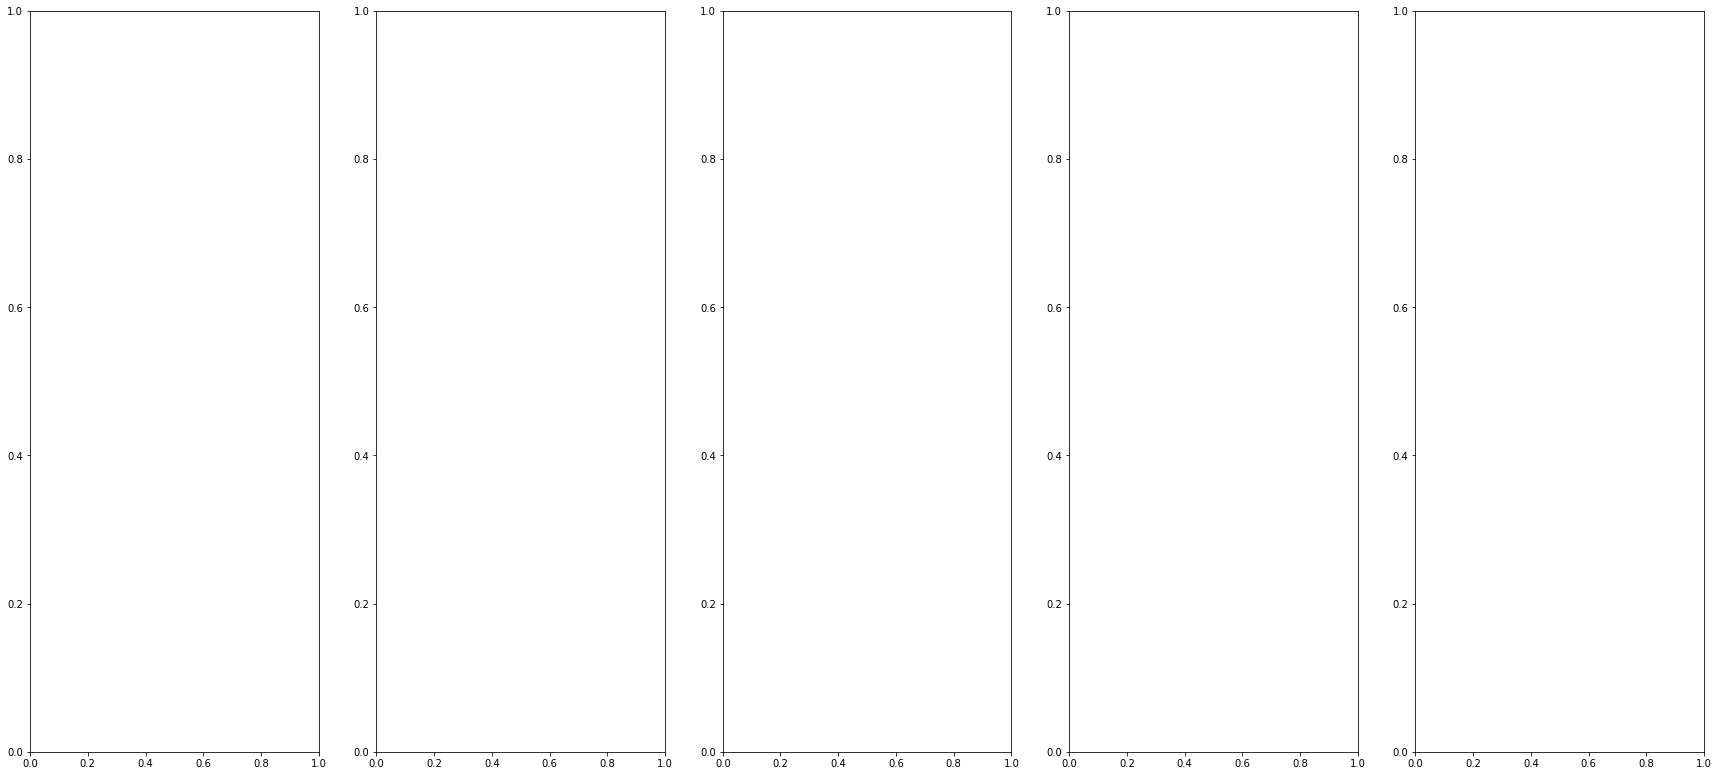

In [42]:
fig2 = plt.figure(figsize=(30,30))
#plt.figure(figsize=(6,8))
rows = 2
cols = 5

ax1 = fig2.add_subplot(rows, cols, 1)
ax2 = fig2.add_subplot(rows, cols, 2)
ax3 = fig2.add_subplot(rows, cols, 3)
ax4 = fig2.add_subplot(rows, cols, 4)
ax5 = fig2.add_subplot(rows, cols, 5)


ax1.imshow(img.imread('person_1/train/f_'+str(2041).zfill(4)+'.png'))
ax2.imshow(img.imread('person_1/train/f_'+str(16).zfill(4)+'.png'))
ax3.imshow(img.imread('person_1/train/f_'+str(2931).zfill(4)+'.png'))
ax4.imshow(img.imread('person_1/train/f_'+str(1455).zfill(4)+'.png'))
ax5.imshow(img.imread('person_1/train/f_'+str(4757).zfill(4)+'.png'))

In [ ]:
wwwwwwwwwwwwwwwwwwwwww

In [ ]:
w